# Статистика, DS-поток
## Задание SP.3

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash; 60 баллов
* Задача 3 &mdash; 80 баллов
* Задача 4 &mdash; 60 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *средне-высокая:* задача 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [1]:
# Bot check

# HW_ID: ds_sp3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from scipy.stats import beta, norm, expon

sns.set(font_scale=1.5, palette='Set2')
set2_colors = sns.color_palette("Set2")

*Замечания.*
1. Вы должны помнить о разнице между оценкой / доверительным интервалом и *реализацией* оценки / доверительного интервала. На практике обычно слово *реализация* опускается.
2. Если оценка/интервал получен на лекции/семинаре, то нужно просто выписать формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

______________
## Задача 1.

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из распределения $U[0, \theta]$. Постройте асимптотические доверительные интервалы: Вальда и на основе аппроксимации $X_{(n)}$ некоторым распределением (см. задание ST.3). Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя функцию из задания SP.2. Нужно нанести на график точки выборки.

Для двух статистик, используемых при построении интервалов, запишите аппроксимацию некоторым распределением неформально в виде "статистика по выборке достаточно большого размера приближенно имеет такое-то распределение". 

Сделайте вывод о том, как влияет на ширину интервала вид статистики и аппроксимация.

**Решение:**

В седьмом номере (7с) АДИ (с уровнем доверия $\alpha$) такой:

$$\left( \frac{X_{(n)}}{1-\frac{\eta_{(1-\alpha)/2}}{n}}, \frac{X_{(n)}}{1-\frac{\eta_{(1+\alpha)/2}}{n}} \right)$$

Где $\eta_k$- $k$-квантиль распределения $\text{Exp}(1)$

Так же в седьмом номере (7a) есть АДИ Вальда:

$$\left( 2\overline X - 2z_{\frac{1+\alpha}{2}}\frac{S}{\sqrt n}, 2\overline X + 2z_{\frac{1+\alpha}{2}}\frac{S}{\sqrt n} \right)$$

Где $z_k$ - $k$-квантиль распределения $N(0, 1)$, а $S$ - несмещенная оценка дисперсии: $S^2 = \frac{1}{n - 1}\sum_{i=0}^n (X_i - \overline X)^2$

Распределение статистики $X_{(n)}$: $\text{Beta}(n, 1)$, она аппроксимируется $\theta(1 - \frac{Y}{n}), Y \sim Exp(1)$ - из задачи 7 (просто надо выразить из $Y = n\left( 1 - \frac{X_{(n)}}{\theta} \right)$ сам $X_{(n)}$

Распределение статистики $\overline X$ дает ЦПТ: приближенно $N(\theta/2, \sigma^2/n)$ - опять из 7а

**Как видно, первая статистика должна сходится быстрее и с более узким интервалом, чем вторая статистика (за счет члена $\frac{1}{n}$ по сравнению с отклонением $\frac{1}{\sqrt n}$ во втором)**

Функция построения графиков:

In [20]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None,
    ylim=(-1, 10), color_estimation='#FF3300', color_interval='#00CC66',
    color_sample='#0066FF', label_estimation='Оценка',
    label_interval='Интервал'
):
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.

    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    :param label_interval: подпись для интервала
    '''
    
    n = len(left)
    plt.fill_between(range(1, n+1), left, right, color=color_interval,
                     alpha=0.3, label=label_interval)
    
    if estimation is not None:
        plt.plot(range(1, n+1), estimation, color=color_estimation,
                 label=label_estimation)

    i = 1
    if sample is not None:
        plt.scatter([i] * i, sample[:i], color=color_sample,
                    alpha=0.3, s = 1, label='Точка выборки')
        for i in range(2, n+1):
            plt.scatter([i] * i, sample[:i], color=color_sample,
                        alpha=0.3, s = 1)#, label='Выборка', s=10)

    plt.ylim(ylim)
    plt.xlabel('Размер выборки')
    plt.ylabel('Оценка параметра')
    plt.legend()
    plt.grid(True)

Сама генерация выборки:

In [27]:
alpha = 0.95
theta = 5
N = 100
X = np.random.uniform(0, theta, N)

X_max = [np.max(X[:n]) for n in range(1, N+1)]

# Доверительный интервал для theta на основе экспоненциального распределения
eta_lower = expon.ppf((1 - alpha) / 2)
eta_upper = expon.ppf((1 + alpha) / 2)

left_theta_exp = X_max / (1 - eta_lower / np.arange(1, N+1))
right_theta_exp = X_max / (1 - eta_upper / np.arange(1, N+1))

# Доверительный интервал Вальда для theta
X_mean = np.array([np.mean(X[:n]) for n in range(1, N+1)])
z = norm.ppf((1 + alpha) / 2)
sigma_est = [np.std(X[:n], ddof=1) for n in range(1, N+1)]

left_theta_wald = 2 * X_mean - 2 * z * np.array(sigma_est) / np.sqrt(np.arange(1, N+1))
right_theta_wald = 2 * X_mean + 2 * z * np.array(sigma_est) / np.sqrt(np.arange(1, N+1))

Построение графиков

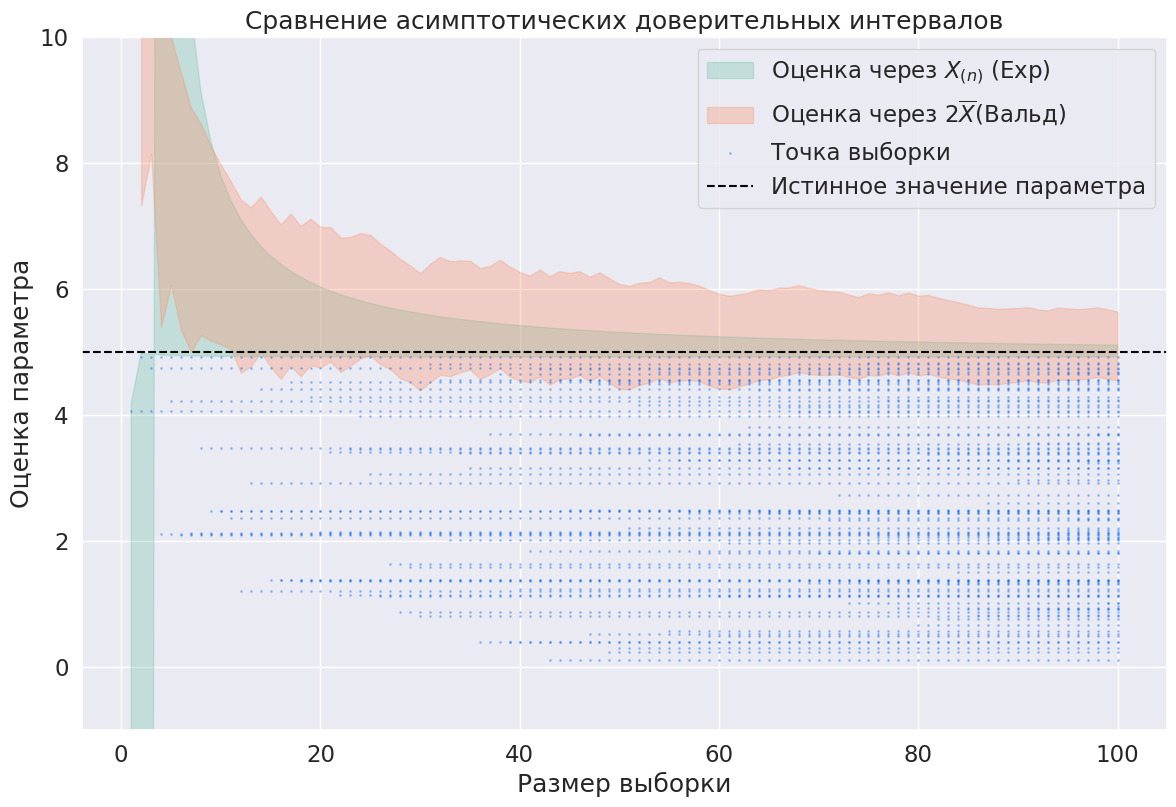

In [28]:
plt.figure(figsize=(14, 9))

# экспоненциальное
draw_confidence_interval(left_theta_exp, right_theta_exp, estimation=None,
                         sample=None, color_interval=set2_colors[0],
                         label_interval=r'Оценка через $X_{(n)}$ (Exp)')

# Вальд
draw_confidence_interval(left_theta_wald, right_theta_wald, estimation=None,
                         sample=X, color_interval=set2_colors[1],
                         label_interval=r'Оценка через $2\overline{X}$(Вальд)')

plt.axhline(theta, color='black', linestyle='--',
            label='Истинное значение параметра')
plt.legend()
plt.title('Сравнение асимптотических доверительных интервалов')
plt.show()

**Как видно**, теоретические предположения выполнились, оценка через $X_{(n)}$ сходится быстрее и более узкая

Можно дать и идейное объяснение этому: Вальд использует только ЦПТ - более общий результат, а такая оценка через $X_{(n)}$ построена для более узкого случая, исключительно для равномерного непрерывного распределения.

Сравните два исследуемых интервала по величине доли покрытия истинного значения $\theta$. Посмотрите примеры в ноутбуке с семинара.

Функции построения интервалов:

In [6]:
def get_exp_confint(sample, alpha=0.95, axis=-1):
    '''
    Построение доверительного интервала на основе экспоненциального распределения.

    :param sample: Массив, содержащий выборки вдоль последней оси
    :type sample: numpy.array

    :return: (left, right) - Левые и правые границы доверительных 
    интервалов
    '''
    n = sample.shape[axis]
    X_max = np.max(sample, axis=axis)

    eta_lower = expon.ppf((1 - alpha) / 2)
    eta_upper = expon.ppf((1 + alpha) / 2)

    left_theta_exp = X_max / (1 - eta_lower / n)
    right_theta_exp = X_max / (1 - eta_upper / n)
    
    return left_theta_exp, right_theta_exp

def get_wald_confint(sample, alpha=0.95, axis=-1):
    '''
    Построение доверительного интервала Вальда.

    :param sample: Массив, содержащий выборки вдоль последней оси
    :type sample: numpy.array

    :return: (left, right) - Левые и правые границы доверительных интервалов
    '''
    X_mean = sample.mean(axis=axis)
    n = sample.shape[axis]
    
    sigma_est = np.std(sample, axis=axis, ddof=1)
    z = norm.ppf((1 + alpha) / 2)
    
    left_theta_wald = 2 * X_mean - 2 * z * sigma_est / np.sqrt(n)
    right_theta_wald = 2 * X_mean + 2 * z * sigma_est / np.sqrt(n)
    
    return left_theta_wald, right_theta_wald

def get_coverage_rate(ci_builder, sample, theta_space, alpha=0.95):
    '''
    Вычисляет долю покрытия параметра доверительным интервалом 

    :param ci_builder: Функция, по выборке строящая доверительные интервалы,
    должна возвращать пару массивов: левые и правые границы доверительных 
    интервалов
    :type ci_builder: numpy.array -> (numpy.array, numpy.array)

    :param sample: Выборка, для которой будут построены доверительные интервалы 
    :type sample: numpy.array 

    :param theta_space: Сетка из значений параметра равномерного распределения
    :type theta_space: numpy.array

    :param alpha: Уровень доверия для построения ДИ 
    :type alpha: float 
    '''
    left, right = ci_builder(sample, alpha, axis=-1)
    return np.mean(
        (left <= theta_space.reshape(-1, 1)) & (theta_space.reshape(-1, 1) <= right),
        axis=-1,
    )

Функции запуска эксперимента:

In [4]:
def run_few_experiments(
        sample_size=100, 
        num_exps=1000, 
        theta_gran=100, 
        methods=[get_wald_confint, get_exp_confint],
        alpha=0.95):
    '''
    Запускает небольшое количество экспериментов по определнию доли покрытия параметра
    доверительными интервалами из methods 

    :param sample_size: Размер выборки
    :param num_exps: Число экспериментов 
    :param theta_gran: Размер сетки параметра 
    :param methods: Список функций для построения ДИ
    :param alpha: Уровень доверия
    '''
    theta_space = np.linspace(0, 1, theta_gran)
    samples = sps.uniform(
        scale=theta_space.reshape(-1, 1, 1)
    ).rvs(
        size=(len(theta_space), num_exps, sample_size)
    )
    return np.array([
        get_coverage_rate(method, samples, theta_space, alpha)
        for method in methods
    ])

def run_many_experiments(
        sample_size=100, 
        num_exps=1_000_000,
        small_num_exps=1_000, 
        theta_gran=100, 
        methods=[get_wald_confint, get_exp_confint],
        alpha=0.95):
    '''
    Запускает большое количество экспериментов по определнию доли покрытия параметра
    доверительными интервалами из methods путем многократного запуска run_few_experiments

    :param sample_size: Размер выборки
    :param num_exps: Число экспериментов всего 
    :param small_num_exps: Число экспериментов в каждом запуске run_few_experiments 
    :param theta_gran: Размер сетки параметра 
    :param methods: Список функций для построения ДИ
    :param alpha: Уровень доверия
    '''
    results = np.zeros((2, theta_gran))
    launches = num_exps // small_num_exps
    for _ in tqdm(range(launches)):
        results += run_few_experiments(sample_size, small_num_exps, theta_gran, methods, alpha)
    return results / launches

Запуск эксперимента

In [5]:
THETA_GRAN = 1000  # Размер сетки параметра
NUM_EXPS = 1_000  # Число экспериментов всего
NUM_SMALL_EXPS = 100  # Число экспериментов в одном запуске
SAMPLE_SIZE = 50  # Размер выборки 
ALPHA = 0.95  # Уровень доверия
METHODS = [get_wald_confint, get_exp_confint]  # Методы построения ДИ
NAMES = ['Дов. интервал Вальда', r'Дов. интервал через $X_{(n)}$']  # Названия методов 

results = run_many_experiments(SAMPLE_SIZE, NUM_EXPS,
                               NUM_SMALL_EXPS, THETA_GRAN, METHODS, ALPHA)

NameError: name 'get_wald_confint' is not defined

Функция для отрисовки графиков

In [9]:
def plot_results(results, names):
    '''
    Функция для отрисовки графиков
    '''
    _, (ax1, ax2) = plt.subplots(figsize=(20, 11), nrows=2, ncols=1)
    for name, result in zip(names, results):
        theta_space = np.linspace(0, 1, THETA_GRAN)
        ax1.plot(theta_space, result, label=name, lw=2)

    ax1.hlines(0.95, 0, 1, color='gray', alpha=0.3, lw=5)
    ax1.legend()
    ax1.set_ylabel("Доля покрытия")
    #ax1.set_ylim(0.85, 1)
    ax1.set_title("Доля покрытия параметра, Размер выборки: {}".format(SAMPLE_SIZE))
    
    ax2.plot(theta_space, results[1, :] - results[0, :], lw=2)
    #ax2.set_ylim(-0.1, 0.2)
    ax2.set_ylabel("Разность между долями покрытия")
    ax2.set_xlabel("Параметр $\\theta$")

Отрисуем

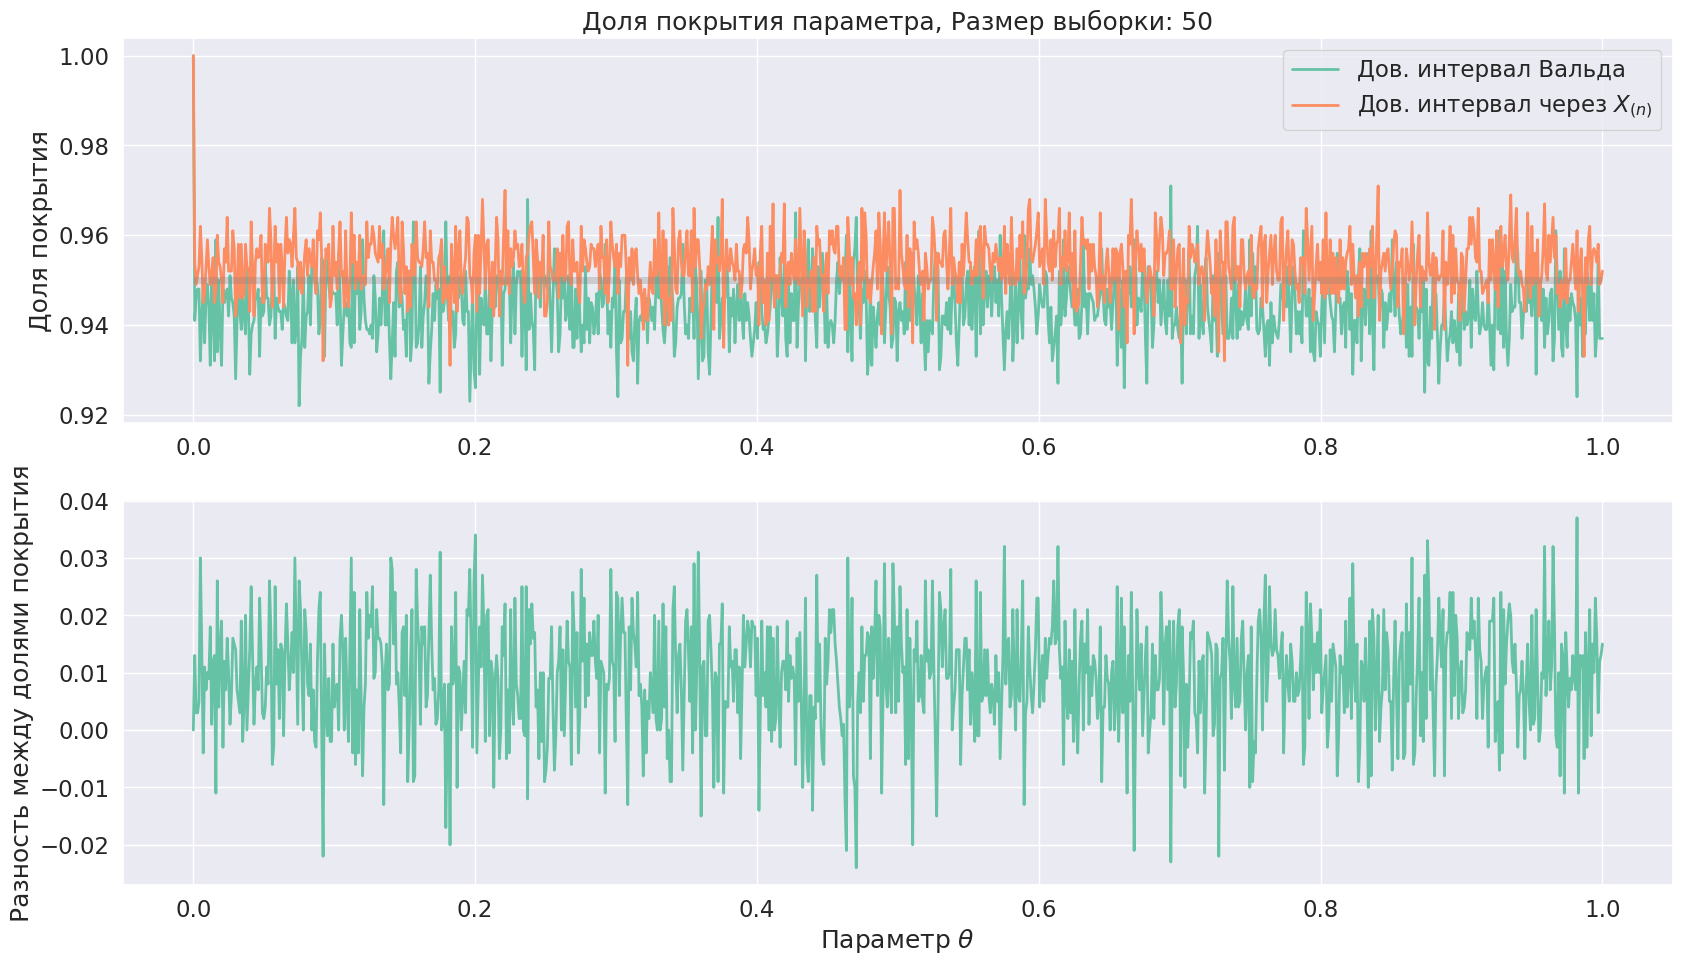

In [10]:
plot_results(results, NAMES)

Для большего размера выборки:

100%|███████████████████████████████████████████| 10/10 [00:37<00:00,  3.75s/it]


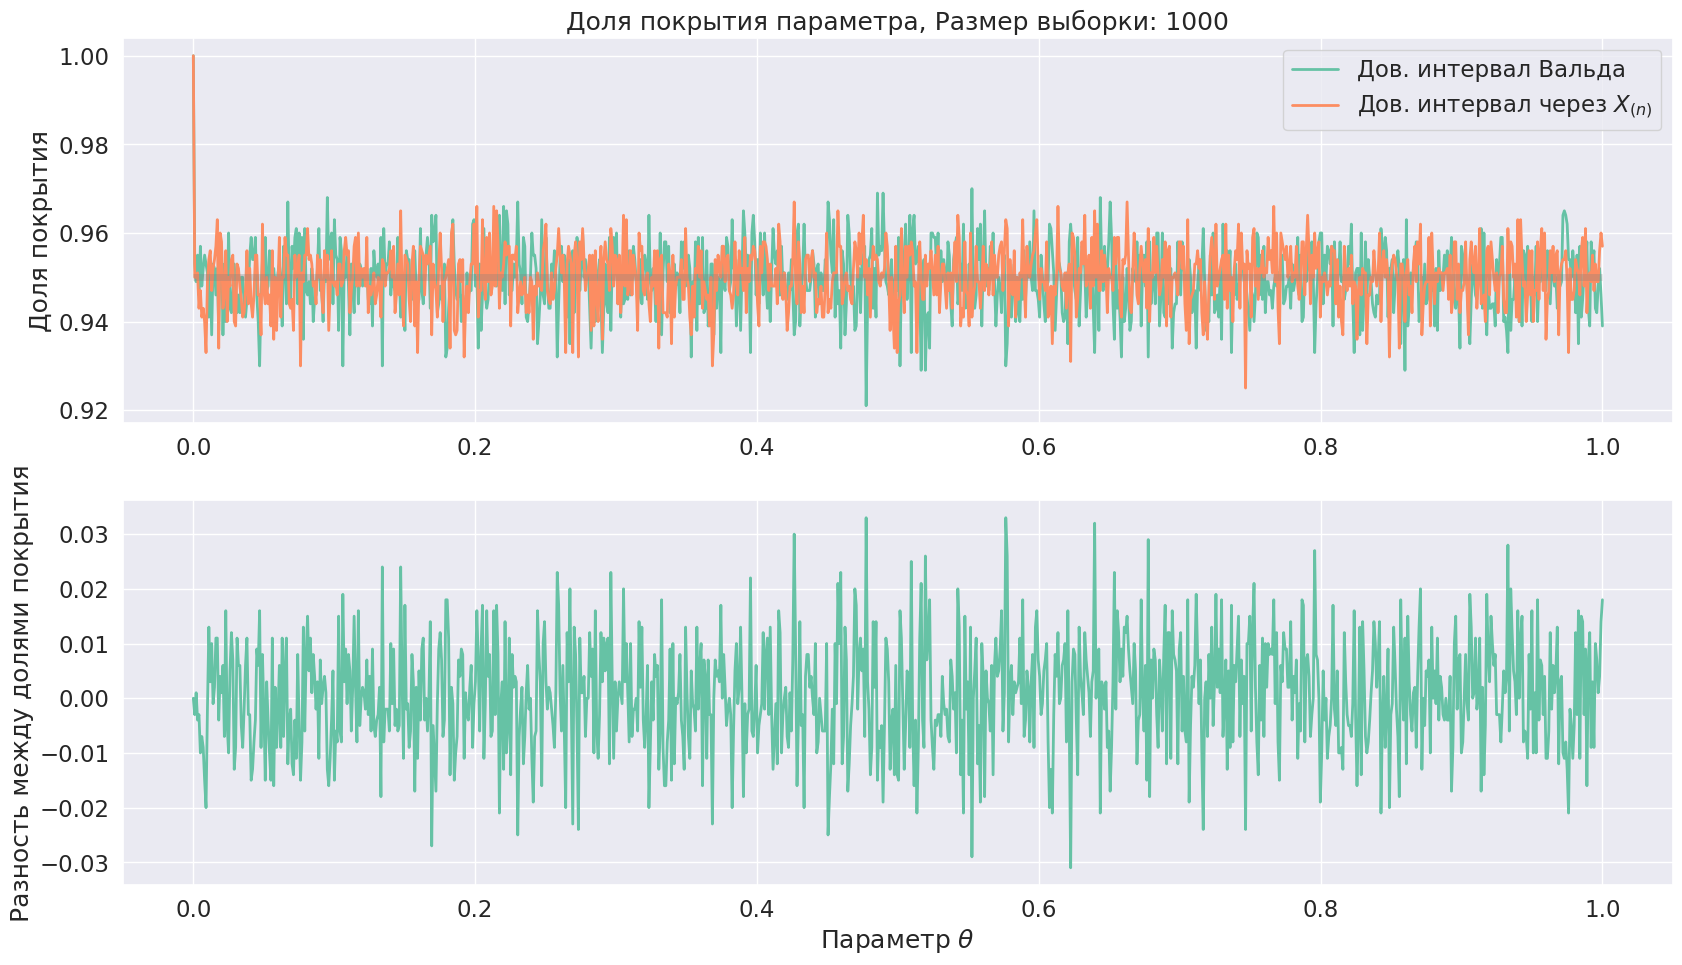

In [11]:
SAMPLE_SIZE = 1000

results = run_many_experiments(SAMPLE_SIZE, NUM_EXPS,
                               NUM_SMALL_EXPS, THETA_GRAN, METHODS, ALPHA)
plot_results(results, NAMES)

**Вывод:** 

Если смотреть на долю покрытия, то при более маленькой выборке доля покрытия чуть лучше у интервала через $X_{(n)}$, что сходится с общим принципом. При этом оба интервала достаточно хорошо покрывают параметр уже при выборке размера 50.

У равномерного распределения нет критичных значения параметра, поэтому график горизонтальный.

Это все соотносится с общим принципом, что частное лучше общего.

__________________
## Задача 2.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на лекции. Выпишите только ответы.

Асимптотический доверительный интервал: $$\left(\overline X - z_{(1+\alpha)/2} \frac{s}{\sqrt n}, \overline X + z_{(1+\alpha)/2} \frac{s}{\sqrt n}\right)$$

Где $z_k$ - $k$-квантиль распределения $N(0, 1)$, а $S$ - несмещенная выборочная дисперсия

Точный доверительный интервал:  $$\left(\overline X - t_{(1+\alpha)/2} \frac{s}{\sqrt n}, \overline X + t_{(1+\alpha)/2} \frac{s}{\sqrt n}\right)$$

Где $t_k$ - $k$-квантиль распределения Стьюдента с $n-1$ степенью свободы


Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [12]:
def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    '''
    Вычисляет асимптотические доверительные интервалы для матожидания.

    :param sample: выборка данных
    :param alpha: уровень значимости (по умолчанию 0.95)
    :return: кортеж (левый предел, правый предел)
    '''
    n = sample.shape[0]
    means = np.cumsum(sample) / np.arange(1, n + 1)
    sigma_est = [np.std(sample[:n], ddof=1) for n in range(1, n + 1)]
    z = sps.norm.ppf((1 + alpha) / 2)

    left = means - z * (sigma_est / np.sqrt(np.arange(1, n + 1)))
    right = means + z * (sigma_est / np.sqrt(np.arange(1, n + 1)))

    return left, right


def calculate_confidence_intervals(sample, alpha=0.95):
    '''
    Вычисляет точные доверительные интервалы для матожидания.

    :param sample: выборка данных
    :param alpha: уровень значимости (по умолчанию 0.95)
    :return: кортеж (левый предел, правый предел)
    '''
    n = sample.shape[0]
    means = np.cumsum(sample) / np.arange(1, n + 1)
    sigma_est = [np.std(sample[:n], ddof=1) for n in range(1, n + 1)]
    t = sps.t.ppf((1 + alpha) / 2, df=np.arange(1, n + 1) - 1)

    left = means - t * (sigma_est / np.sqrt(np.arange(1, n + 1)))
    right = means + t * (sigma_est / np.sqrt(np.arange(1, n + 1)))

    return left, right

Сгенерируйте выборку из нормального распределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

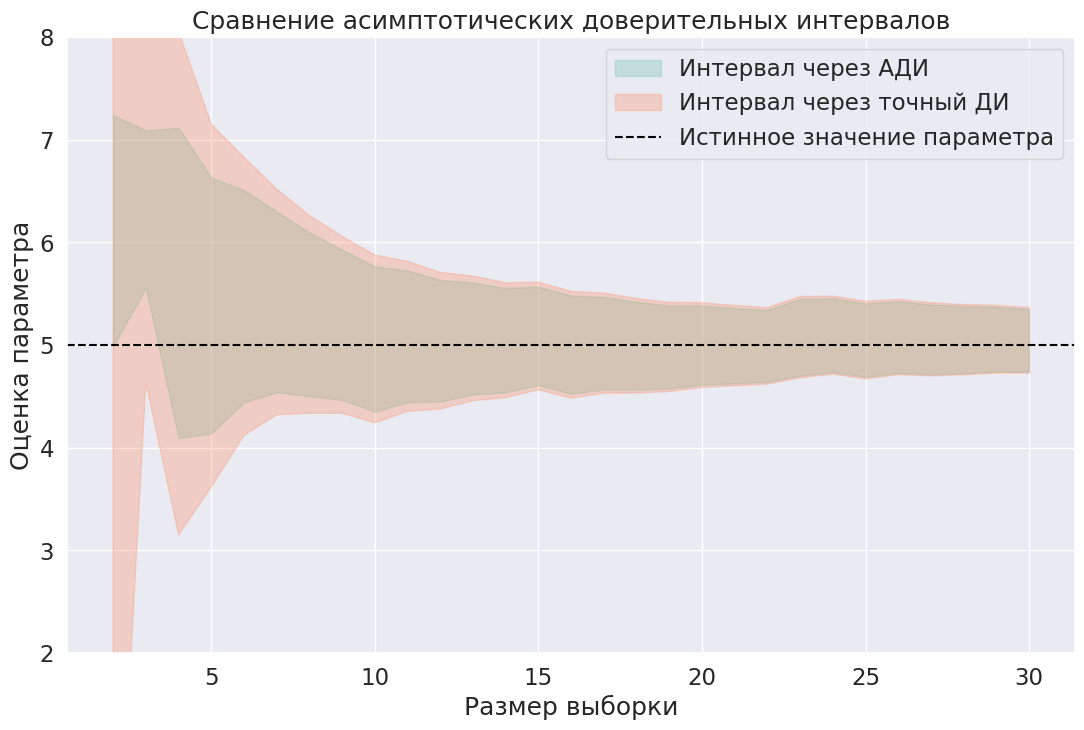

In [13]:
sample = sps.norm(loc=5, scale=1).rvs(size=(30,))

plt.figure(figsize=(13, 8))

left, right = calculate_asymptotic_confidence_intervals(sample)

draw_confidence_interval(left, right, estimation=None,
                         sample=None, color_interval=set2_colors[0],
                         label_interval=r'Интервал через АДИ')

left, right = calculate_confidence_intervals(sample)

draw_confidence_interval(left, right, estimation=None,
                         sample=None, color_interval=set2_colors[1],
                         label_interval=r'Интервал через точный ДИ',
                         ylim=(2,8))

plt.axhline(5, color='black', linestyle='--', label='Истинное значение параметра')
plt.legend()
plt.title('Сравнение асимптотических доверительных интервалов')
plt.show()

Сравните также эти интервалы по величине доли покрытия истинного значения параметра сдвига.

In [14]:
coverage_asymp = []
coverage_conf = []
experiments_cnt = 1000
single_sample_size = 25
sample = sps.norm(loc=5, scale=1).rvs(size=(experiments_cnt, single_sample_size))

for i in range(experiments_cnt):
    asymp_l, asymp_r = calculate_asymptotic_confidence_intervals(sample[i])
    conf_l, conf_r = calculate_confidence_intervals(sample[i])
    coverage_asymp.append(asymp_l[-1] < 5 < asymp_r[-1])
    coverage_conf.append(conf_l[-1] < 5 < conf_r[-1])

print("Доля покрытия для асимптотического ДИ:", np.mean(coverage_asymp))
print("Доля покрытия для точного ДИ:", np.mean(coverage_conf))

Доля покрытия для асимптотического ДИ: 0.946
Доля покрытия для точного ДИ: 0.956


**Вывод:** 

На маленьких выборках оценка АДИ более узкая из-за отсутствия неопределенности в распределении стьюдента. С увеличением выборки интервалы почти совпадают. Оба интервала сужаются как $\frac{1}{\sqrt n}$ из соотвествующего множителя в границах

При этом точный ДИ дает более точную оценку чем АДИ (и доля покрытия действительно $\alpha$), что ожидаемо, потому что второй дает лишь ассимптотическую оценкю


Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

Чтение нужных столбцов

In [15]:
data = pd.read_csv('wine.data', header=None)
columns_names = {
    0: 'class',
    1: 'Alcohol',
    2: 'Malic acid',
    3: 'Ash',
    4: 'Alcalinity of ash',
    5: 'Magnesium',
    6: 'Total phenols',
    7: 'Flavanoids',
    8: 'Nonflavanoid phenols',
    9: 'Proanthocyanins',
    10: 'Color intensity',
    11: 'Hue',
    12: '0D280/0D315 of diluted wines',
    13: 'Proline'
}
data.rename(columns=columns_names, inplace=True)
wine1 = data[data['class'] == 1]

Таблица

In [16]:
columns_needed = ["Alcalinity of ash",
                  "Nonflavanoid phenols",
                  "Proanthocyanins", "Hue"]
intervals_table = []

for column in columns_needed:
    sample = wine1[column].values
    asymp_l, asymp_r = calculate_asymptotic_confidence_intervals(sample)
    conf_l, conf_r = calculate_confidence_intervals(sample)
    intervals_table.append({
        'Column': column,
        'Aсимптотический ДИ': (round(asymp_l[-1], 2), round(asymp_r[-1], 2)),
        'Точный ДИ': (round(conf_l[-1], 2), round(conf_r[-1], 2))
    })

pd.DataFrame(intervals_table)

/home/ubaca/Projects/Jupyter/JupyterVenv/lib64/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubaca/Projects/Jupyter/JupyterVenv/lib64/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Column,Aсимптотический ДИ,Точный ДИ
0,Alcalinity of ash,"(16.39, 17.69)","(16.37, 17.7)"
1,Nonflavanoid phenols,"(0.27, 0.31)","(0.27, 0.31)"
2,Proanthocyanins,"(1.79, 2.0)","(1.79, 2.01)"
3,Hue,"(1.03, 1.09)","(1.03, 1.09)"


In [17]:
wine1[columns_needed].mean()

Alcalinity of ash       17.037288
Nonflavanoid phenols     0.290000
Proanthocyanins          1.899322
Hue                      1.062034
dtype: float64

**Вывод:**
Мы смогли на практике посчитать интервалы для датасета, причем средние значения попали в наши доверительные интервалы

__________________
## Задача 3. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

Доверительный интервал для среднего $a$:
$$
\overline X \pm t_{(1+\alpha)/2, n-1} \cdot \frac{S}{\sqrt{n}}
$$

Доверительный интервал для дисперсии  $\sigma^2$:
$$
\left( \frac{(n-1)S^2}{\chi^2_{(1+\alpha)/2, n-1}}, \frac{(n-1)S^2}{\chi^2_{(1-\alpha)/2, n-1}} \right)
$$

Для того чтобы получить ДИ уровня доверия $\alpha$ для пары параметров, достаточно перемножить ДИ уровня доверия $\hat \alpha = 1 - \frac{1-\alpha}{2} = \frac{1+\alpha}{2} = 0.975$ (было в ST.3)

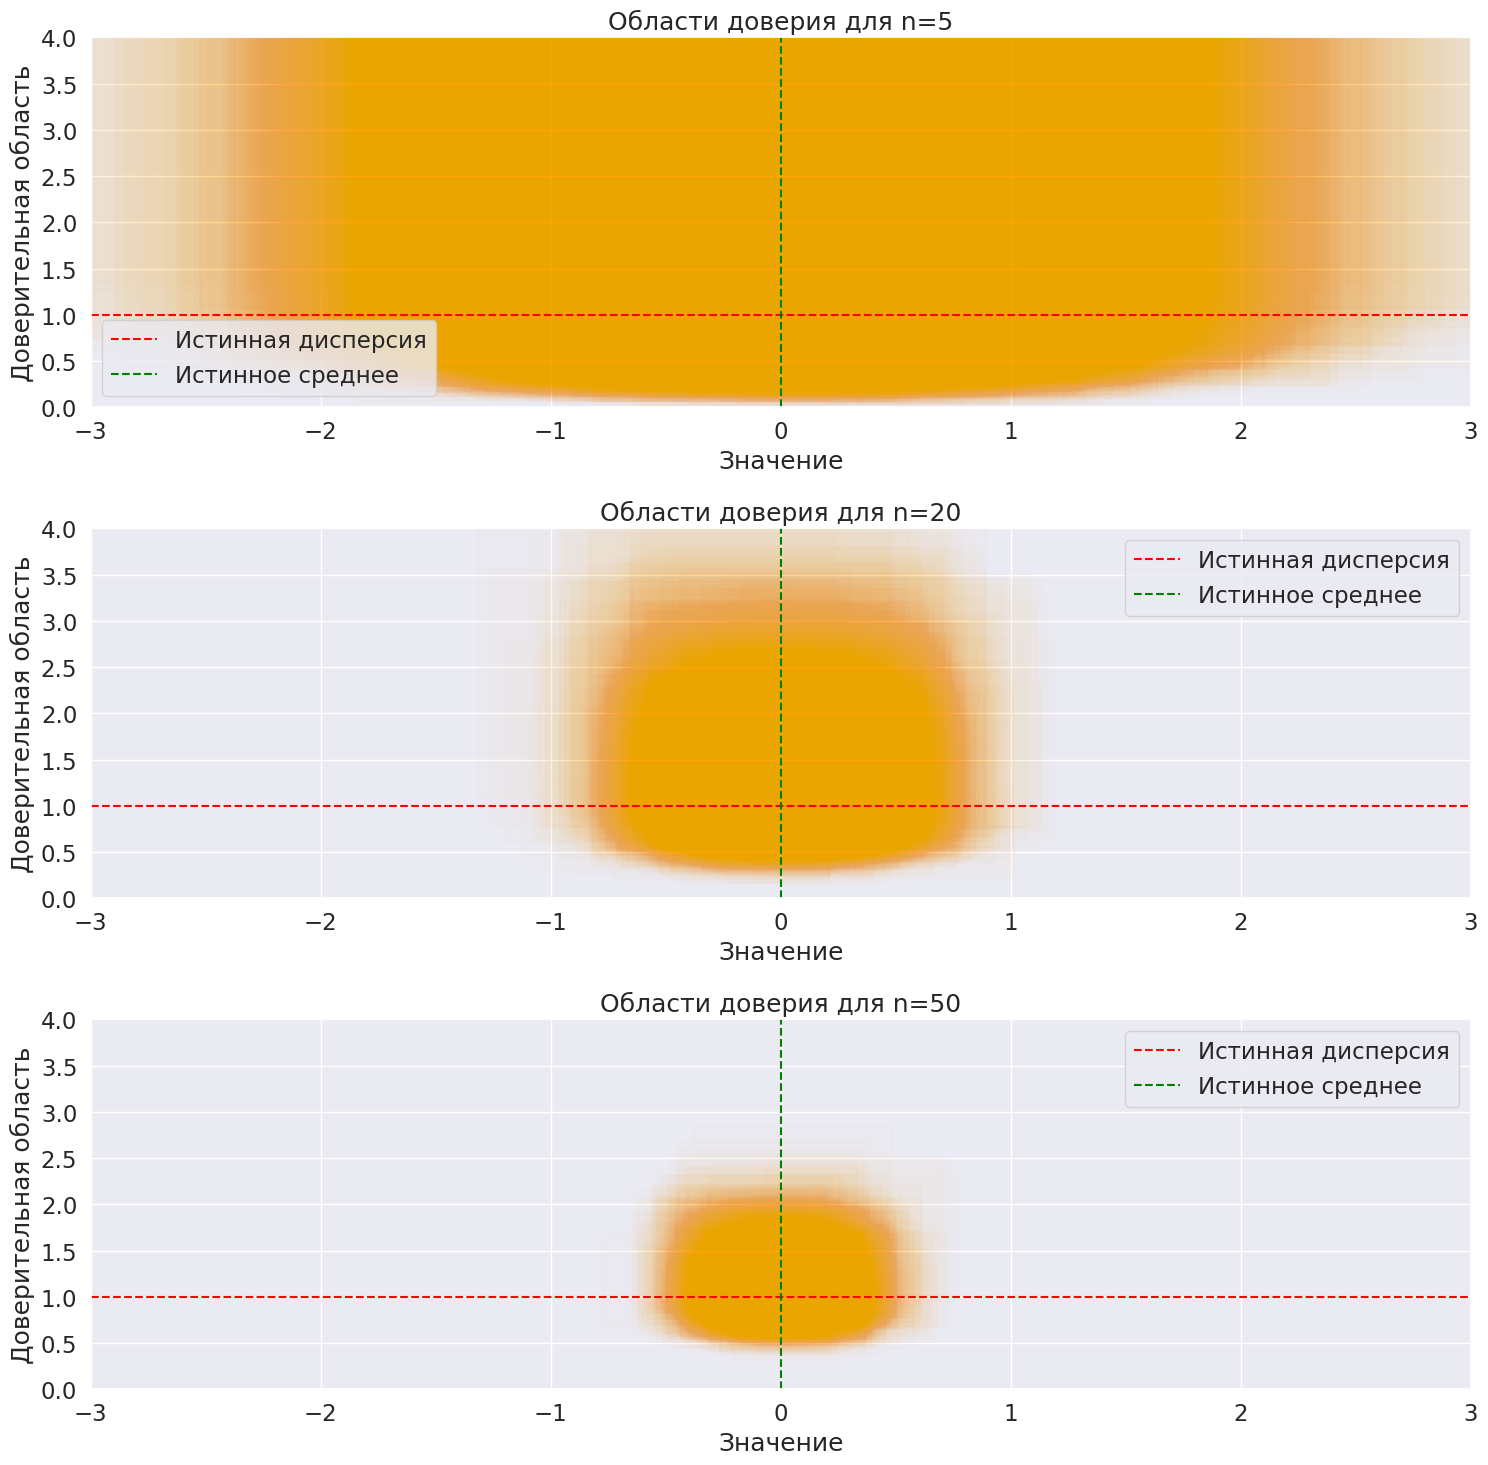

Доля покрытия для n=5: 0.95
Доля покрытия для n=20: 0.95
Доля покрытия для n=50: 0.94


In [19]:
true_mean = 0
true_variance = 1
true_std = np.sqrt(true_variance)

sample_sizes = [5, 20, 50]
alpha = 0.95
alpha_hat = 0.975
n_simulations = 500
coverage_results = []

x_limits = (-3, 3)
y_limits = (0, 4)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

for i, n in enumerate(sample_sizes):
    coverage_count = 0
    for _ in range(n_simulations):
        sample = np.random.normal(true_mean, true_std, n)
        
        sample_mean = np.mean(sample)
        sample_variance = np.var(sample, ddof=1)

        t = sps.t.ppf((1 + alpha_hat) / 2, df=n-1)
        confidence_interval_mean = (sample_mean - t * (np.sqrt(sample_variance) / np.sqrt(n)),
                                     sample_mean + t * (np.sqrt(sample_variance) / np.sqrt(n)))

        chi2_lower = sps.chi2.ppf((1 - alpha_hat) / 2, df=n-1)
        chi2_upper = sps.chi2.ppf((1 + alpha_hat) / 2, df=n-1)
        confidence_interval_variance = ((n-1) * sample_variance / chi2_upper,
                                         (n-1) * sample_variance / chi2_lower)

        if confidence_interval_mean[0] <= true_mean <= confidence_interval_mean[1] and \
           confidence_interval_variance[0] <= true_variance <= confidence_interval_variance[1]:
            coverage_count += 1

        # Квадраты доверительной области
        axes[i].add_patch(plt.Rectangle((confidence_interval_mean[0], confidence_interval_variance[0]),
                                         confidence_interval_mean[1] - confidence_interval_mean[0],
                                         confidence_interval_variance[1] - confidence_interval_variance[0],
                                         color='orange', alpha=0.01))

    # Доля покрытия
    coverage_proportion = coverage_count / n_simulations
    coverage_results.append(coverage_proportion)

    axes[i].set_xlim(x_limits)
    axes[i].set_ylim(y_limits)
    axes[i].set_title(f'Области доверия для n={n}')
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Доверительная область')
    axes[i].axhline(y=true_variance, color='red', linestyle='--', label='Истинная дисперсия')
    axes[i].axvline(x=true_mean, color='green', linestyle='--', label='Истинное среднее')
    axes[i].legend()

plt.tight_layout()
plt.show()

for n, coverage in zip(sample_sizes, coverage_results):
    print(f'Доля покрытия для n={n}: {coverage:.2f}')


Исследуйте построенную доверительную область по величине доли покрытия параметра $\theta$.

См выше

**Вывод:** 

1) Как видно, доли покрытия >=0.95 по всех выборках, что и требовалось

2) С увеличением числа элементов в выборке уменьшается площадь, заметаемая доверительными интервалами (оранжевая площадь) - они уменьшаются, интервалы становятся более узкими, что и ожидалось

3) Оранжевый квадрат покрывает истинные значения параметров, то есть ДИ корректные.